In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ## 데이터 불러오기

In [23]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/2조_머신러닝_미니프로젝트/res/raw_data/20년 KBO리그.csv',
                 index_col=0)

df

,연도,팀명,G,W,D,L,WPCT,R,R(A),RD,...,PB,SB,CS,CS%,SBA(R),SB(R),CS(R),SB(R)%,OOB,PKO(R)
0,2001,KIA,133,60,5,68,0.469,683,727,-44,...,10,100,53,34.6,155,92,63,59.4,0,0
1,2001,LG,133,58,8,67,0.464,669,732,-63,...,16,110,55,33.3,154,96,58,62.3,0,0
2,2001,SK,133,60,2,71,0.458,596,640,-44,...,19,106,44,29.3,182,123,59,67.6,0,0
3,2001,두산,133,65,5,63,0.508,732,733,-1,...,12,126,56,30.8,166,132,34,79.5,0,0
4,2001,롯데,133,59,4,70,0.457,718,670,48,...,12,85,58,40.6,159,106,53,66.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2021,두산,144,71,8,65,0.522,738,656,82,...,10,83,48,36.6,118,81,37,68.6,48,11
180,2021,롯데,144,65,8,71,0.478,727,808,-81,...,8,101,44,30.3,91,60,31,65.9,54,8
181,2021,삼성,144,76,9,59,0.563,712,658,54,...,5,61,26,29.9,160,116,44,72.5,47,7
182,2021,키움,144,70,7,67,0.511,722,700,22,...,5,85,35,29.2,123,97,26,78.9,39,3


# # 머신러닝 준비

## ## 쓰이는 함수 정리
  * [map(), lambda](https://wikidocs.net/64)
    - map(첫 번째 매개변수, 두 번째 매개변수)
      + 첫 번째 매개변수로는 함수가 오고
      + 두 번째 매개변수로는 반복 가능한 자료형 (출처: https://blockdmask.tistory.com/531 [개발자 지망생])

In [24]:
df['WIN']

0      N
1      N
2      N
3      Y
4      N
      ..
179    N
180    N
181    N
182    N
183    N
Name: WIN, Length: 184, dtype: object

## ## 데이터 정제
  * 'WIN'컬럼, 'POST'컬럼 데이터를 알고리즘 처리에 적합하게 정제
  * target 데이터가 1,0으로 바꾸기
    - Y = 1
    - N = 0 

In [25]:
df['POST'] = df['POST'].map(lambda x : 0 if x == 'N' else 1)

## ## target 데이터 변수 설정

In [26]:
post_y = df['POST']

## ## 사용할 컬럼 설정
  * 데이터 분석 결과 최종 사용할 컬럼 선정

In [27]:
features = ['AVG', 'OPS', 'RISP', 'ERA', 'WHIP', 'FPCT']

In [28]:
# 전체 팀 기록에서 필요한 컬럼만 선정
ratio_X = df[features]

In [29]:
ratio_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AVG     184 non-null    float64
 1   OPS     184 non-null    float64
 2   RISP    184 non-null    float64
 3   ERA     184 non-null    float64
 4   WHIP    184 non-null    float64
 5   FPCT    184 non-null    float64
dtypes: float64(6)
memory usage: 10.1 KB


In [30]:
ratio_X.head()

,AVG,OPS,RISP,ERA,WHIP,FPCT
0,0.278,0.781,0.272,5.01,1.47,0.979
1,0.276,0.754,0.280,5.09,1.60,0.980
2,0.260,0.728,0.255,4.38,1.41,0.981
3,0.276,0.780,0.278,4.96,1.56,0.979
4,0.280,0.790,0.288,4.68,1.50,0.981


# # 알고리즘 성능평가

## ## 알고리즘 후보

In [31]:
# scikit-learn 패키지

from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier      # 결정트리 분류
from sklearn.ensemble import RandomForestClassifier  # 앙상블/랜덤포레스트
from sklearn.naive_bayes import GaussianNB           # 나이브베이즈
from sklearn.svm import SVC                          # 서퍼트백터머신 분류

In [32]:
als = {
  #'알고리즘명':('선의모양', 알고리즘객체)
  'LogisticRegression'    :( '-' , LogisticRegression(random_state = 0) ),
  'DecisionTreeClassifier':( '--' , DecisionTreeClassifier(random_state = 0) ),
  'RandomForestClassifier':( '.-' , RandomForestClassifier(random_state = 0) ),
  'GaussianNB'            :( '--' , GaussianNB() ),
  'SVC'                   :( '-' , SVC() ),
}

## ## 훈련용, 테스트용 데이터 분리

In [33]:
from sklearn.model_selection import train_test_split

# # 시간 확인!!

## ## 정확도 및 분류 레포트 출력
  * range(0,10)  = 1분 미만
  * range(0,200) = 1시간 소요

In [34]:
from sklearn.metrics import accuracy_score

# 변수를 만들어주기 위해 값을 정해야 하는데, 
# 리스트가 될지 문자열 등이 될지 모를 때 'None'으로 설정해준다.
top_level_acc = 0
top_level_name = None 
acc_list = list()

for idx1 in range(0,20) :
  X_train, X_test, y_train, y_test = train_test_split(ratio_X,
                                                      post_y,
                                                      test_size=0.2,
                                                      random_state = idx1)
  for idx2 in range(0,20) :
    als = {
            #'알고리즘명':('선의모양', 알고리즘객체)
            'LogisticRegression'    :( '-' , LogisticRegression(random_state = idx2) ),
            'DecisionTreeClassifier':( '--' , DecisionTreeClassifier(random_state = idx2) ),
            'RandomForestClassifier':( '.-' , RandomForestClassifier(random_state = idx2) ),
            'GaussianNB'            :( '--' , GaussianNB() ),
            'SVC'                   :( '-' , SVC(random_state = idx2) )
            }
    
    for name, (lineStyle, model) in als.items() : 
      model.fit( X_train, y_train )

      pred_y = model.predict(X_test)

      # 정확도가 가장 높은 알고리즘 및 수치 값들만 출력하시오.
      cur_acc = accuracy_score(y_test, pred_y)

      acc_list.append(cur_acc)

      #  * top_level_acc가 cur_acc(새로운 알고리즘의 정확도)보다 낮으면 갱신
      if cur_acc > top_level_acc :
        top_level_acc = cur_acc
        top_level_name = [ model, cur_acc, idx1, idx2 ]

print(acc_list)
print(top_level_name)

[0.7567567567567568, 0.6756756756756757, 0.8378378378378378, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.7297297297297297, 0.8378378378378378, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.6216216216216216, 0.8648648648648649, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.6486486486486487, 0.8108108108108109, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.6486486486486487, 0.8378378378378378, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.7027027027027027, 0.8378378378378378, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.6216216216216216, 0.8378378378378378, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.6756756756756757, 0.8378378378378378, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.7027027027027027, 0.8648648648648649, 0.7567567567567568, 0.7297297297297297, 0.7567567567567568, 0.7027027027027027, 0.8378378378378378, 0.7567567567567568, 0.7297297297297297,

In [35]:
top_level_name

[RandomForestClassifier(random_state=6), 0.918918918918919, 13, 6]

## ## 선정된 알고리즘 분류 레포트

In [36]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(ratio_X,
                                                    post_y,
                                                    test_size=0.2,
                                                    random_state = top_level_name[2])
  
model = top_level_name[0]

# 학습
model.fit( X_train, y_train )

# 예측
pred = model.predict_proba( X_test ) 

pred_y = model.predict(X_test)

print('정확도', model, accuracy_score(y_test, pred_y) )
print('분류 레포트\n', classification_report(y_test, pred_y))

정확도 RandomForestClassifier(random_state=6) 0.918918918918919
분류 레포트
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.89      0.94      0.92        18

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



# # 2021 팀 데이터로 예측

In [37]:
features_with_year_team = ['연도','팀명','AVG', 'OPS', 'RISP', 'ERA', 'WHIP', 'FPCT']

ratio_X_new = df[features_with_year_team]

df_2021 = ratio_X_new[ratio_X_new['연도'] == 2021]

features_with_team = ['팀명','AVG', 'OPS', 'RISP', 'ERA', 'WHIP', 'FPCT']

df_2021 = df_2021[features_with_team]

df_2021 = df_2021.set_index('팀명')

df_2021

,AVG,OPS,RISP,ERA,WHIP,FPCT
팀명,,,,,,
KIA,0.248,0.673,0.263,4.89,1.50,0.979
KT,0.265,0.737,0.270,3.67,1.32,0.979
LG,0.250,0.710,0.253,3.57,1.31,0.983
NC,0.261,0.759,0.260,4.54,1.48,0.979
SSG,0.261,0.774,0.261,4.82,1.51,0.981
두산,0.268,0.740,0.290,4.26,1.48,0.983
롯데,0.278,0.755,0.286,5.37,1.57,0.984
삼성,0.267,0.743,0.265,4.30,1.45,0.983
키움,0.259,0.723,0.279,4.31,1.46,0.976


## ## 데이터프레임 형태로 결과 추출
  * 차트를 내림차순하기 위해

In [38]:
dict_to_df_result = pd.DataFrame(columns = ['확률'])

for index, row  in df_2021.iterrows() :
    proba = model.predict_proba([row])[0][1]*100
    dict_to_df_result.loc[index] = proba
    print(f'{index} :  {proba:.4}%')

chart_df = dict_to_df_result.sort_values(by='확률', ascending = False)

chart_df = chart_df.round(3)

chart_df

KIA :  1.0%
KT :  95.0%
LG :  91.0%
NC :  16.0%
SSG :  8.0%
두산 :  79.0%
롯데 :  5.0%
삼성 :  74.0%
키움 :  75.0%
한화 :  3.0%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

,확률
KT,95.0
LG,91.0
두산,79.0
키움,75.0
삼성,74.0
NC,16.0
SSG,8.0
롯데,5.0
한화,3.0
KIA,1.0


## ## 시각화

In [39]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

# 차트 전체 폰트 한글(실행후 런타임 재실행 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호도 표시
mpl.rcParams['axes.unicode_minus'] = False

# seaborn 차트 스타일
plt.style.use('seaborn-pastel')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## ## 함수화

In [40]:
def draw_bar_chart(chart_df, title='KBO 정규시즌 우승확률'):
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.barplot(x = chart_df.index,
                y = list(chart_df['확률']),
                ax=ax
                )
    
    # 축과 그래프 사이 간격을 살짝 벌린다.
    sns.despine(fig)

    ax.grid(False)
    ax.set_yticks([])

    fig.suptitle(title, fontsize = 20)

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.1f}%'.format(y_value)
        plt.annotate(label, (x_value, y_value), ha='center', fontsize=10)
    
    plt.savefig(title)
    plt.show()

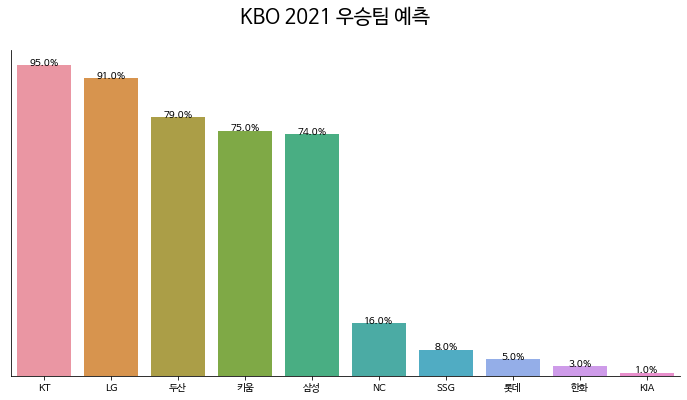

In [41]:
draw_bar_chart(chart_df, title='KBO 2021 우승팀 예측')

## ## 결과 비교

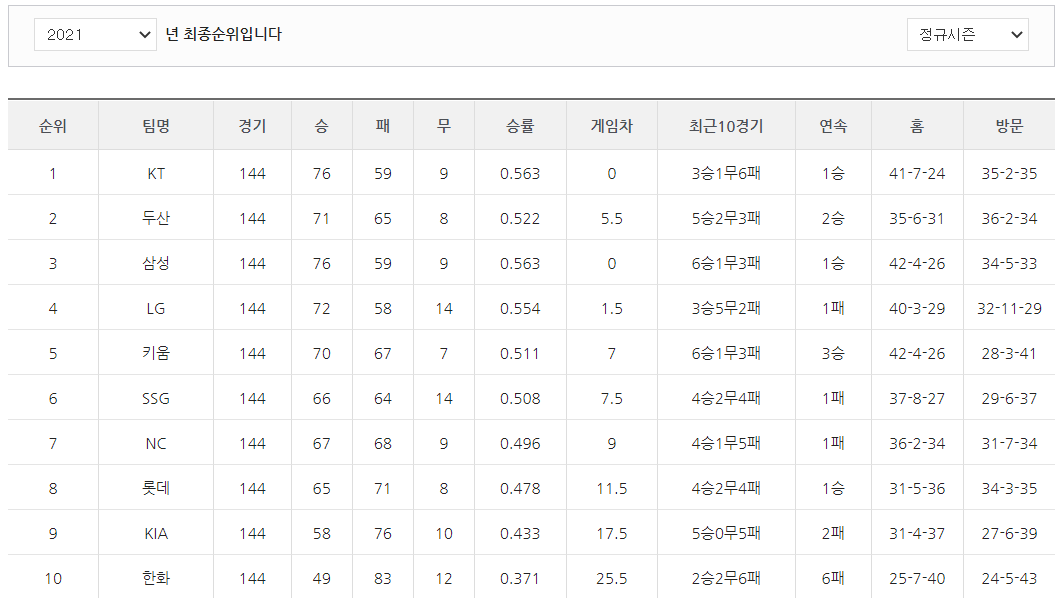

In [42]:
from IPython.display import Image

Image('/content/drive/MyDrive/Colab Notebooks/머신러닝/2조_머신러닝_미니프로젝트/res/raw_data/2021 리그 순위.png')

# # 2022 예측(4월 19일 기준)

In [43]:
df_20220419 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/머신러닝/2조_머신러닝_미니프로젝트/res/raw_data/KBO_4월20일 기준.xlsx',
                 sheet_name = '종합')

features_with_team = ['팀명','AVG', 'OPS', 'RISP', 'ERA', 'WHIP', 'FPCT']

df_20220419 = df_20220419[features_with_team]

df_20220419 = df_20220419.set_index('팀명')

#
dict_to_df_result = pd.DataFrame(columns = ['확률'])

for index, row  in df_20220419.iterrows() :
    proba = model.predict_proba([row])[0][1]*100
    dict_to_df_result.loc[index] = proba
    print(f'{index} :  {proba:.4}%')

chart_df = dict_to_df_result.sort_values(by='확률', ascending = False)

chart_df = chart_df.round(3)

# 마이너스 기호도 표시
mpl.rcParams['axes.unicode_minus'] = False

# seaborn 차트 스타일
plt.style.use('seaborn-pastel')

def draw_bar_chart(chart_df, title='KBO 정규시즌 우승확률'):
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.barplot(x = chart_df.index,
                y = list(chart_df['확률']),
                ax=ax
                )
    
    # 축과 그래프 사이 간격을 살짝 벌린다.
    sns.despine(fig)

    ax.grid(False)
    ax.set_yticks([])

    fig.suptitle(title, fontsize = 20)

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.1f}%'.format(y_value)
        plt.annotate(label, (x_value, y_value), ha='center', fontsize=10)
    
    plt.savefig(title)
    plt.show()

두산 :  25.0%
롯데 :  20.0%
삼성 :  20.0%
키움 :  24.0%
한화 :  8.0%
KIA :  43.0%
KT :  32.0%
LG :  30.0%
NC :  2.0%
SSG :  84.0%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

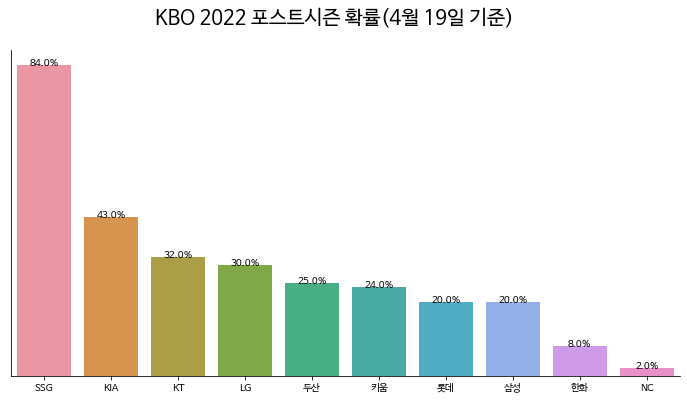

In [45]:
draw_bar_chart(chart_df, 'KBO 2022 포스트시즌 확률(4월 19일 기준)')

## ## [결과 비교](https://www.koreabaseball.com/TeamRank/TeamRank.aspx)